In [26]:
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt


 Actually Numpy already splits image into three chanels (RGB) red, green and blue: 

 (1440, 1440, 3)


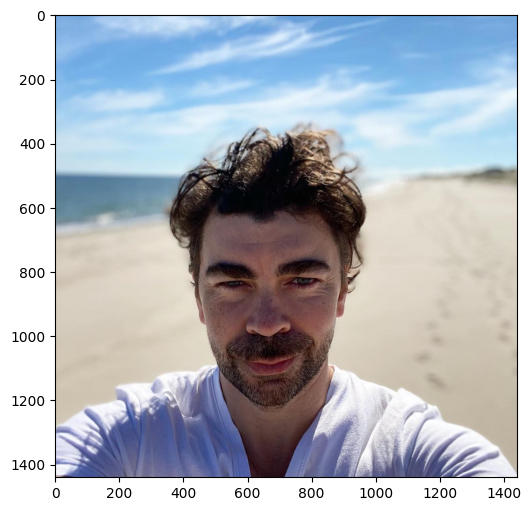

In [27]:
image = Image.open('/Users/kirillkotrikov/Downloads/313423542_10159821078683190_8486188622577027267_n.jpg')

plt.figure(figsize=[10,6])

plt.imshow(image);

print(f"\n Actually Numpy already splits image into three chanels (RGB) red, green and blue: \n\n {np.array(image).shape}")

In [28]:
# rescaling image data

scaled_image = np.array(image) / np.array(image).max()

In [29]:
blue, green, red = np.array(scaled_image)[:,:,0], np.array(scaled_image)[:,:,1], np.array(scaled_image)[:,:,2]

print(f"\n blue shape: {blue.shape}, green shape: {green.shape}, red shape: {red.shape}")


 blue shape: (1440, 1440), green shape: (1440, 1440), red shape: (1440, 1440)


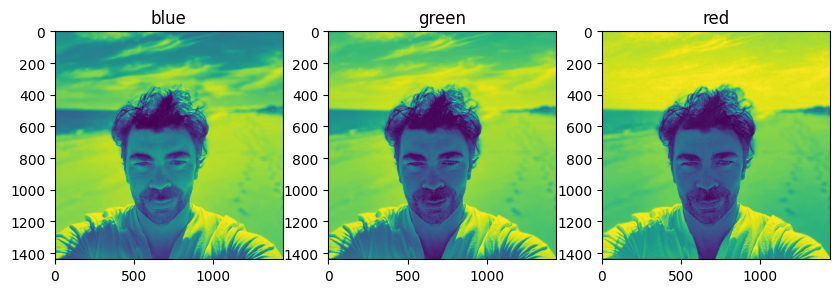

In [30]:
colors={'blue':blue,'green':green,'red':red}

fig = plt.figure(figsize=(10, 7))

for i,ii in zip(colors,range(0,len(colors),1)):
        
    plt.subplot(1,3,ii+1)
    
    plt.imshow(colors[i])
    
    plt.title(str(i))

plt.show()

In [31]:
# Obtain the covariance matrix
red_cov_mat = np.cov(red.T)
green_cov_mat = np.cov(green.T)
blue_cov_mat = np.cov(blue.T)

# Perform eigendecomposition
red_eig_vals, red_eig_vecs = np.linalg.eig(red_cov_mat)
green_eig_vals, green_eig_vecs = np.linalg.eig(green_cov_mat)
blue_eig_vals, blue_eig_vecs = np.linalg.eig(blue_cov_mat)

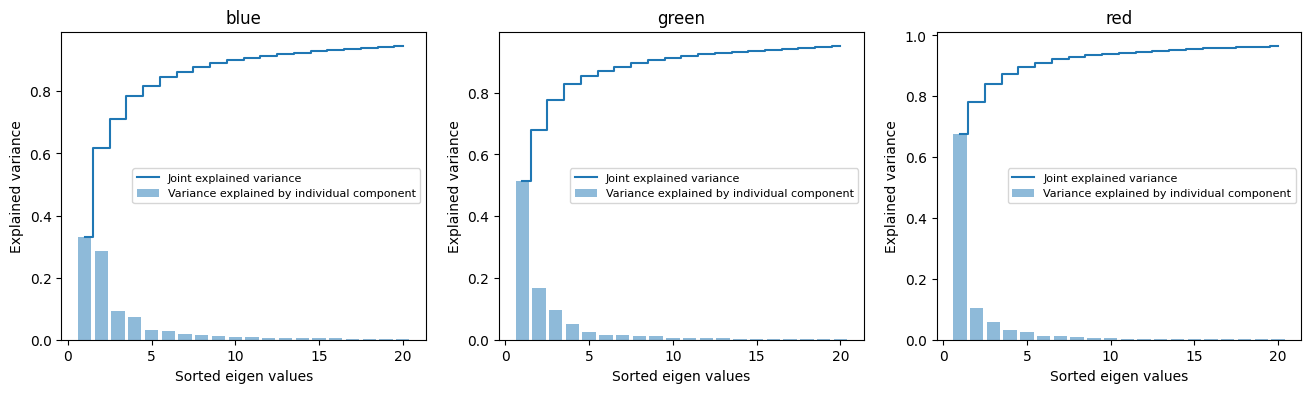

In [32]:
eig_vals={'blue_eig_vals':blue_eig_vals,'green_eig_vals':green_eig_vals,'red_eig_vals':red_eig_vals}

fig = plt.figure(figsize=(16,4))

for i,ii in zip(eig_vals,range(0,len(eig_vals),1)):
    
    tot = sum(eig_vals[i]) # total variance
    
    var_exp = [(iii / tot) for iii in sorted(eig_vals[i], reverse=True) ] # Individual explained variance
    
    cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
    
    plt.subplot(1,3,ii+1)
    
    plt.bar(range(1,21),var_exp[:20], alpha = 0.5, label='Variance explained by individual component') # Taking 20 principal components
    
    plt.step(range(1,21),cum_var_exp[:20],where='mid',label='Joint explained variance')
    
    plt.ylabel('Explained variance')
    
    plt.xlabel('Sorted eigen values')
    
    plt.legend(loc=5,prop={'size':8})
    
    plt.title(str(i)[:-9])

In [33]:
# Sort eigenvalues in descending order
red_sorted_indices = np.argsort(red_eig_vals)[::-1]
green_sorted_indices = np.argsort(green_eig_vals)[::-1]
blue_sorted_indices = np.argsort(blue_eig_vals)[::-1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


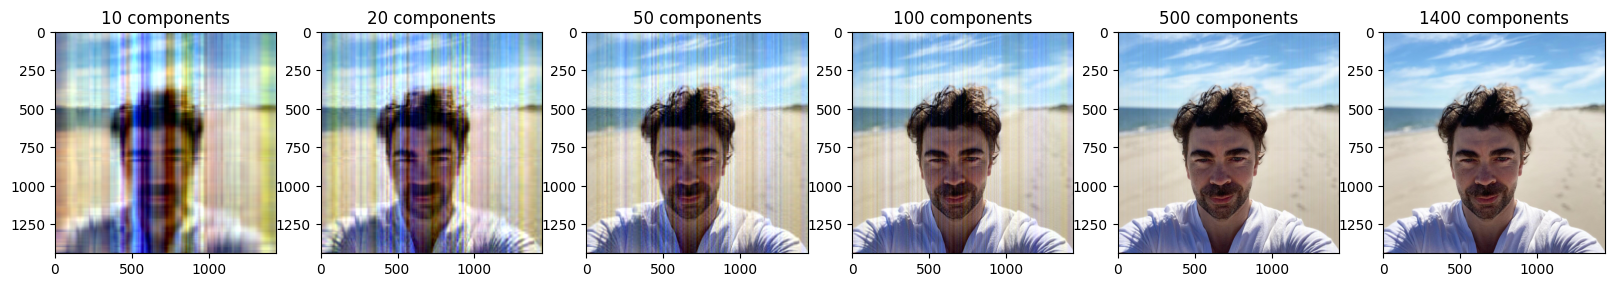

In [34]:
num_of_pc=[10,20,50,100,500,1400]

fig = plt.figure(figsize=(20, 20))

for i,ii in zip(num_of_pc,range(len(num_of_pc))):
    
    # Select the top k eigenvectors
    k = i
    
    red_selected_eig_vecs = red_eig_vecs[:, red_sorted_indices[:i]]
    green_selected_eig_vecs = green_eig_vecs[:, green_sorted_indices[:i]]
    blue_selected_eig_vecs = blue_eig_vecs[:, blue_sorted_indices[:i]]

    # Project the standardized image onto the selected eigenvectors
    red_reduced_image = np.dot(red, red_selected_eig_vecs)
    green_reduced_image = np.dot(green, green_selected_eig_vecs)
    blue_reduced_image = np.dot(blue, blue_selected_eig_vecs)

    # Perform the inverse transformation
    red_reconstructed_image = np.dot(red_reduced_image, red_selected_eig_vecs.T)
    green_reconstructed_image = np.dot(green_reduced_image, green_selected_eig_vecs.T)
    blue_reconstructed_image = np.dot(blue_reduced_image, blue_selected_eig_vecs.T)

    # Combine the color channels
    reconstructed_image = np.dstack((blue_reconstructed_image, green_reconstructed_image,red_reconstructed_image))

    plt.subplot(1,6,ii+1)
    
    # Display the reconstructed image
    plt.imshow(reconstructed_image)
    
    plt.title(str(i) + ' components')

plt.show()